# Diabetes project

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

## 1.1 Read SPSS databaseabs

In [2]:
df_spss = pd.read_spss("..\data\DIALECT.sav")


In [3]:
df_spss

,Subjectnr,Geslacht,Leeftijd_poli1,Polidatum1,Polijaar_1,Polibezoek,Arts,Freq_arts,Freq_vp,Freq_tot,...,SumOfvite,SumOfrae,SumOffole,SumOfzink,SumOfdpa,SumOfarachidonz,SumOffolaat,SumOfnico,SumOfwater,SumOfnatrium
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,man,65.0,2009-08-31,2009.0,Eerste bezoek,Schot,4.0,0.0,4.0,...,13.267616,602.510257,173.289978,9.203426,0.000000,0.034463,173.289978,16.178387,1591.211480,2607.443336
3,2.0,man,61.0,2009-08-31,2009.0,Eerste bezoek,Oving,1.0,4.0,5.0,...,10.662237,645.575531,133.897548,7.454809,0.000010,0.047574,133.897548,16.796363,2216.603139,1891.477166
4,3.0,man,56.0,2009-08-31,2009.0,Eerste bezoek,Veneman,0.0,0.0,0.0,...,29.996976,1207.776682,209.312323,13.193616,0.000494,0.031634,205.339877,22.143815,2758.233627,3351.952037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,732.0,vrouw,74.0,2019-05-22,2019.0,Eerste bezoek,van berkum,3.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,733.0,vrouw,28.0,2019-04-26,2019.0,Eerste bezoek,Visser,7.0,24.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,734.0,man,65.0,2019-05-08,2019.0,Eerste bezoek,de Vries,5.0,8.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,736.0,man,77.0,2019-05-22,2019.0,Eerste bezoek,Laverman,4.0,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 Read Excel files

In [4]:
def read_recursively(path: str) -> list:
    """Read the data for each one of the folder """
    paths = list(Path(path).iterdir())
    paths.sort()
    return {k: df for k, df in [process_folder(p) for p in paths]}


def process_folder(dir: Path) -> list:
    """Read the files from each folder"""
    path_name = dir / f"{dir.name}-steps.xlsx"
    if path_name.exists():
        df = pd.read_excel(path_name)
    else:
        df = None
    return dir.name, df

In [5]:
time_series = read_recursively("..\data\Diabetes ZGT data")
time_series.keys()

dict_keys(['1001', '1002', '353', '364', '369', '371', '380', '458', '466', '470', '471', '473', '476', '477', '479', '480', '482', '483', '485', '486', '487', '488', '489', '490', '491', '497', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '519', '520', '521', '522', '523', '524', '525', '527', '529', '530', '531', '532', '536', '537', '538', '540', '541', '542', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', 

In [6]:
df_353 = time_series['353']
df_353
df_353.columns

Index(['time', '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20'],
      dtype='object')

# 2 Features

* [x] Geslacht => new column called "Gender"
* [x] Leeftijd_poli1
* [x] Freq_tot
* [x] DMduur = polijaar_1 – Dmaanvang
* [x] Pack_years
* [x] Alcoholgebruik1EHpermaand
* [x] Lengte_poli1
* [x] Gewicht_poli1
* [x] Buikomvang_1
* [x] Heupomvang_1
* [x] SBP_poli1
* [x] DBP_poli1
* [x] Pols
* [x] Microvas_total (INPUT OR OUTPUT)
* [x] Macrovasculaire_ziekten (INPUT OR OUTPUT)
* [x] SerumHbA1c_1 (INPUT OR OUTPUT)
* [x] Serum_cholesterol_1
* [x] Total_number_drugs
* [x] Total_EH_Insulin = dosA10AB + dosA10AC + dosA10AD + dosA10AE. If there is no outcome (NaN), it should be filled in with 0.



## 3 Clean the dataframes

In [7]:
def replace_with_mean_if_nan(df: pd.DataFrame, columns: list, max_nan: int = 50) -> pd:
    """Iterate over the columns of the dataframe and replace the nan values with the mean"""
    df_ml = pd.DataFrame()
    for c in columns:
        nas = df[c].isna().any().sum()
        if nas > max_nan:
            raise RuntimeError(f"Column {c} has more than {max_nan} NaN values!")
        elif df[c].isna().any():    
            df_ml[c] = df[c].fillna(df[c].mean())
        else:
            df_ml[c] = df[c]
    return df_ml

### 3.1 copy data to new DataFrame

In [8]:
features = ["Leeftijd_poli1", "Freq_tot", "Pack_years", "Alcoholgebruik1EHpermaand", "Lengte_poli1","Gewicht_poli1", "Buikomvang_1", "Heupomvang_1", "Serum_cholesterol_1",
            "SerumHbA1c_1", "Total_number_drugs", "Microvas_total"]
print(len(features))

12


In [9]:

properties = df_spss[features]
properties[properties.isna().sum(axis=1) > 3].size

48

Copy features to an empty DataFrame

In [10]:
df_ml = replace_with_mean_if_nan(df_spss, features)

Skip patients with More than 3 Nan in their features

In [11]:
df_ml = df_ml[properties.isna().sum(axis=1) <= 3]

### 3.2 Clean  columns

In [12]:
df_ml["Gender"] = df_spss["Geslacht"].apply(lambda x: 0.0 if x == "man" else 1.0)

In [13]:
 df_ml["DMduur"] = df_spss["Polijaar_1"] - df_spss["DMaanvang"]

In [14]:
df_ml["Total_EH_Insulin"] = df_spss["dosA10AB"].fillna(0) + df_spss["dosA10AC"].fillna(0) + df_spss["dosA10AD"].fillna(0) + df_spss["dosA10AE"].fillna(0)

In [15]:
df_ml["Macrovasculaire_ziekten"] = df_spss["Macrovasculaire_ziekten"].apply(lambda x: 0.0 if x == "nee" else 1.0)

In [16]:
df_ml["SBP"] = df_spss[['SBP1', 'SBP2', 'SBP3']].mean(axis=1)
df_ml["SBP"] = df_ml["SBP"].fillna(df_ml["SBP"].mean())

In [17]:
df_ml["DBP"] = df_spss[['DBP1', 'DBP2', 'DBP3']].mean(axis=1)
df_ml["DBP"] = df_ml["DBP"].fillna(df_ml["SBP"].mean())

## 4 Visualize the Data

C:\Users\dHollosyW\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


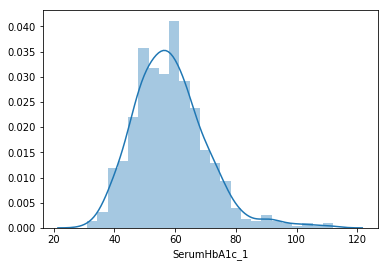

In [18]:
sns.distplot(df_ml["SerumHbA1c_1"])

In [19]:
df_ml["Microvas_total"][ df_ml["Microvas_total"] == 0.0].size

226

In [20]:
df_ml["Macrovasculaire_ziekten"][df_ml["Macrovasculaire_ziekten"] == 0.0].size

429

## 5 Normalize Data

### 5.1 Select the features that  you want to train

In [21]:
named_train_features = ["Leeftijd_poli1", "Freq_tot", "Pack_years", "Alcoholgebruik1EHpermaand", "Lengte_poli1","Gewicht_poli1", "Buikomvang_1", "Heupomvang_1", "Serum_cholesterol_1",
             "Total_number_drugs", "Gender","DMduur", "Total_EH_Insulin", "SBP", "DBP"]

In [22]:
#to_numpy() added to avoid warnings because of depreacated functions
all_data = df_ml[named_train_features].to_numpy()
target = df_ml["SerumHbA1c_1"].to_numpy()

In [23]:
len(all_data[1,:])

15

In [24]:
target.shape

(670,)

In [25]:
>>> from sklearn.preprocessing import Normalizer
transformer_features = Normalizer()
normalized_features = transformer_features.transform(all_data)
normalized_target = target / np.sqrt(np.dot(target, target))


### 5.2 Split the data into training and validation set

In [26]:
# Random split of dataset in training and validation samples
number_of_patients = all_data.shape[0]
indices = np.arange(number_of_patients)
frac_validation = 0.2
size_valid = int(len(indices) * frac_validation) 
index_valid = np.random.choice(indices, size=size_valid, replace=False)
index_train = np.setdiff1d(indices, index_valid, assume_unique=True)  ## Intersection, wat niet in index_valid zit meenemen

In [27]:
print(normalized_features.shape)
train_features = normalized_features[index_train]
valid_features = normalized_features[index_valid]
train_target =  normalized_target[index_train]
valid_target =  normalized_target[index_valid]
print(train_target.size)
print(valid_target.size)

(670, 15)
536
134


## 6 Explore some Regression/Classification model

In [28]:
def create_scatter_plot(predicted: np.ndarray, expected: np.ndarray, workdir: str = ".") -> None:
    """Plot the predicted vs the expected values."""
    predicted = predicted.flatten()
    expected = expected.flatten()
    sns.set()

    df = pd.DataFrame({'expected': expected, 'predicted': predicted})

    sns.regplot(x='expected', y='predicted', data=df)

### 6.1 Random Forest Regressor

C:\Users\dHollosyW\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


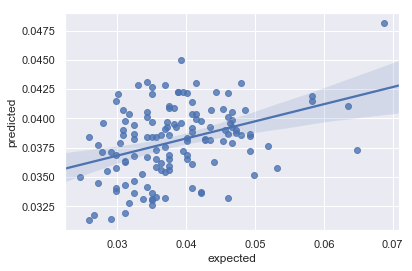

In [29]:
from sklearn.ensemble import RandomForestRegressor
sklearn_model = RandomForestRegressor(n_estimators=100)
# Train data
sklearn_model.fit(train_features, train_target)
predicted = sklearn_model.predict(valid_features)
create_scatter_plot(predicted, valid_target)

In [30]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [31]:
print("RF train accuracy: %0.3f" % sklearn_model.score(train_features, train_target))
print("RF test accuracy: %0.3f" % sklearn_model.score(valid_features, valid_target))

RF train accuracy: 0.874
RF test accuracy: 0.135


In [32]:
importances = sklearn_model.feature_importances_
tree_feature_importances = {key: importances[i] for i, key in enumerate(named_train_features)}

# Converting into list of tuple 
feature_importances = [[k, v] for k, v in tree_feature_importances.items()] 

# Printing list of tuple 
print(feature_importances) 
print(named_train_features) 
print(importances) 
sorted_idx = importances.argsort()
print(sorted_idx)

[['Leeftijd_poli1', 0.07861343942187368], ['Freq_tot', 0.06760695660628527], ['Pack_years', 0.04764124484614946], ['Alcoholgebruik1EHpermaand', 0.046496550218127715], ['Lengte_poli1', 0.06023066665418901], ['Gewicht_poli1', 0.04901899736107864], ['Buikomvang_1', 0.04800566870473442], ['Heupomvang_1', 0.05849615887820992], ['Serum_cholesterol_1', 0.09595412873533692], ['Total_number_drugs', 0.06701236683214205], ['Gender', 0.034257373452946584], ['DMduur', 0.10956485233368028], ['Total_EH_Insulin', 0.11698244408319676], ['SBP', 0.050075817508975294], ['DBP', 0.07004333436307401]]
['Leeftijd_poli1', 'Freq_tot', 'Pack_years', 'Alcoholgebruik1EHpermaand', 'Lengte_poli1', 'Gewicht_poli1', 'Buikomvang_1', 'Heupomvang_1', 'Serum_cholesterol_1', 'Total_number_drugs', 'Gender', 'DMduur', 'Total_EH_Insulin', 'SBP', 'DBP']
[0.07861344 0.06760696 0.04764124 0.04649655 0.06023067 0.049019
 0.04800567 0.05849616 0.09595413 0.06701237 0.03425737 0.10956485
 0.11698244 0.05007582 0.07004333]
[10  3  2

In [33]:
type(importances)

numpy.ndarray

In [34]:
type(named_train_features)

list

In [35]:
named_train_features = np.array(named_train_features)
type(named_train_features)

numpy.ndarray

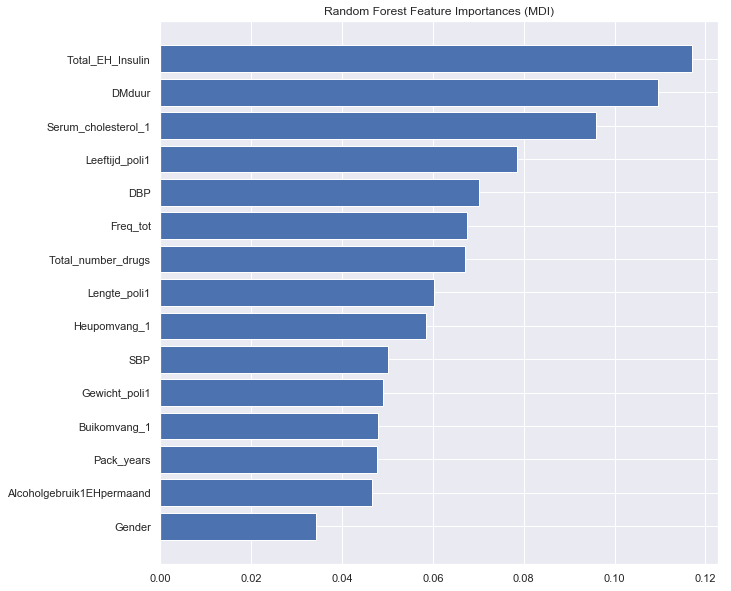

In [36]:
y_ticks = np.arange(0, len(named_train_features))
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(y_ticks, importances[sorted_idx])
ax.set_yticklabels(named_train_features[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
#fig.tight_layout()
plt.show()

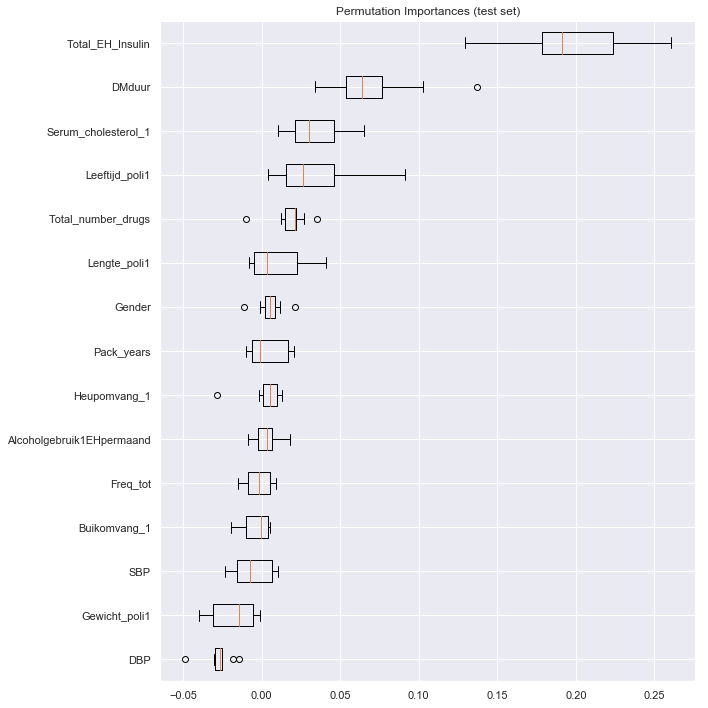

In [40]:
result = permutation_importance(sklearn_model, valid_features, valid_target, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=named_train_features[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

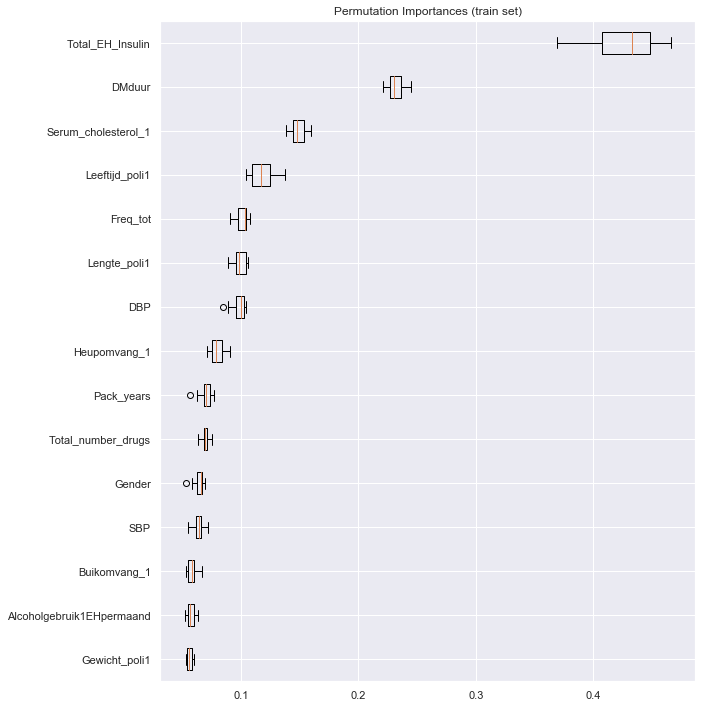

In [43]:
result = permutation_importance(sklearn_model, train_features, train_target, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=named_train_features[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

### 6.2 Hyperparameter optimization

In [69]:
# What are the best hyperparameters?
# gradient descent https://en.wikipedia.org/wiki/Gradient_descent 
#              and https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
# Cost function: cost versus weight

### 6.3 A simple Deep Feedforward Network